# Data Preparation

In [4]:
import numpy as np
import pandas as pd 

df=pd.read_csv(r'dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20693 entries, 0 to 20692
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      20693 non-null  object
 1   created_at               20692 non-null  object
 2   favorite_count           20692 non-null  object
 3   full_text                20692 non-null  object
 4   id_str                   20692 non-null  object
 5   image_url                1481 non-null   object
 6   in_reply_to_screen_name  14381 non-null  object
 7   lang                     20692 non-null  object
 8   location                 15977 non-null  object
 9   quote_count              20692 non-null  object
 10  reply_count              20692 non-null  object
 11  retweet_count            20692 non-null  object
 12  tweet_url                20692 non-null  object
 13  user_id_str              20692 non-null  object
 14  username                 20692 non-nul

## Duplicate Check

In [6]:
duplicates_count = df.duplicated(subset=['full_text']).sum()
print(f'Duplicates count by full_text column.{duplicates_count}')

Duplicates count by full_text column.413


In [9]:
# Menghapus baris duplikat berdasarkan kolom 'full_text'
df = df.drop_duplicates(subset=['full_text'])

duplicates_count = df.duplicated(subset=['full_text']).sum()
print(f'Duplicates count by *full_text* column after removal: {duplicates_count}')


Duplicates count by *full_text* column after removal: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20280 entries, 0 to 20692
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      20280 non-null  object
 1   created_at               20279 non-null  object
 2   favorite_count           20279 non-null  object
 3   full_text                20279 non-null  object
 4   id_str                   20279 non-null  object
 5   image_url                1374 non-null   object
 6   in_reply_to_screen_name  14124 non-null  object
 7   lang                     20279 non-null  object
 8   location                 15710 non-null  object
 9   quote_count              20279 non-null  object
 10  reply_count              20279 non-null  object
 11  retweet_count            20279 non-null  object
 12  tweet_url                20279 non-null  object
 13  user_id_str              20279 non-null  object
 14  username                 20279 non-null  ob

### Replace Janji Jiwa with janji_jiwa

To make it easier for the model to analyze and treat it as a single entity, ensuring more relevant data.

In [15]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'janji jiwa', 'janji_jiwa', text, flags=re.IGNORECASE)
    return text

df['full_text'] = df['full_text'].apply(preprocess_text)


In [17]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.77662E+18,Sat Apr 06 14:26:11 +0000 2024,0,@analostyou Ana tuh nama baik baik,1.77662E+18,NaN,naakeshaa,in,Mekkah,0,1,0,https://x.com/promisenewera/status/17766174021...,1.51793E+18,promisenewera
1,1.7766E+18,Sat Apr 06 14:10:34 +0000 2024,0,@virxwr @sbyfess Madiun,1.77661E+18,NaN,virxwr,in,Mekkah,0,1,0,https://x.com/promisenewera/status/17766134739...,1.51793E+18,promisenewera
2,1.77661E+18,Sat Apr 06 14:05:31 +0000 2024,0,@petitegvrlll Kalo Midnight sale malah sampe j...,1.77661E+18,NaN,petitegvrlll,in,Mekkah,0,0,0,https://x.com/promisenewera/status/17766122020...,1.51793E+18,promisenewera
3,1.77659E+18,Sat Apr 06 14:04:36 +0000 2024,0,@mochalattee_ Kok betah bnget dikamar mandi,1.77661E+18,NaN,mochalattee_,in,Mekkah,0,0,0,https://x.com/promisenewera/status/17766119709...,1.51793E+18,promisenewera
4,1.77659E+18,Sat Apr 06 14:04:24 +0000 2024,0,@ADP_Dini Jangan buu buru juga aih,1.77661E+18,NaN,ADP_Dini,in,Mekkah,0,0,0,https://x.com/promisenewera/status/17766119210...,1.51793E+18,promisenewera


## Relevancy Check

In [20]:
# Filter rows containing 'janji_jiwa' or 'janjiw'. 
relevant_tweets = df[df['full_text'].str.contains(r'\bjanji_jiwa\b|\bjanjiw\b', case=False, na=False)]

In [22]:
dfa=relevant_tweets

In [24]:
dfa.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
11,1.77656E+18,Sat Apr 06 13:13:36 +0000 2024,0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,1.7766E+18,NaN,moonjinbykairaa,in,ꜱ/ʜᴇʀ ✧⁠*,0,0,0,https://x.com/innthv/status/1776599137384894788,1.49835E+18,innthv
13,1.77659E+18,Sat Apr 06 12:44:28 +0000 2024,0,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,1.77659E+18,https://pbs.twimg.com/media/GKe4049bEAARO9o.jpg,NaN,in,NaN,0,2,0,https://x.com/Pastikenasuspen/status/177659180...,1.70431E+18,Pastikenasuspen
32,1.77656E+18,Sat Apr 06 10:51:00 +0000 2024,0,hari ini kopi nya caramel macchiato dari janji...,1.77656E+18,NaN,NaN,in,"legal, hw",0,9,0,https://x.com/kimiakenyu/status/17765632505468...,1.74344E+18,kimiakenyu
33,1.77641E+18,Sat Apr 06 10:05:29 +0000 2024,0,@Pai_C1 janji_jiwa seblak aesthetic,1.77655E+18,NaN,Pai_C1,in,"East Borneo, Indonesia",0,0,0,https://x.com/tama_pacarjeong/status/177655179...,1.17145E+18,tama_pacarjeong
34,1.77522E+18,Sat Apr 06 09:52:04 +0000 2024,0,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,1.77655E+18,NaN,FOODFESS2,in,she/her,0,0,0,https://x.com/mlbblsfussion/status/17765484193...,1.24159E+18,mlbblsfussion


In [26]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10138 entries, 11 to 20691
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      10138 non-null  object
 1   created_at               10138 non-null  object
 2   favorite_count           10138 non-null  object
 3   full_text                10138 non-null  object
 4   id_str                   10138 non-null  object
 5   image_url                1140 non-null   object
 6   in_reply_to_screen_name  5414 non-null   object
 7   lang                     10138 non-null  object
 8   location                 5941 non-null   object
 9   quote_count              10138 non-null  object
 10  reply_count              10138 non-null  object
 11  retweet_count            10138 non-null  object
 12  tweet_url                10138 non-null  object
 13  user_id_str              10138 non-null  object
 14  username                 10138 non-null  o

In [28]:
dfa['created_at'] = pd.to_datetime(dfa['created_at'], errors='coerce', utc=True)

C:\Users\hanif\AppData\Local\Temp\ipykernel_19688\3657895954.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfa['created_at'] = pd.to_datetime(dfa['created_at'], errors='coerce', utc=True)
C:\Users\hanif\AppData\Local\Temp\ipykernel_19688\3657895954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['created_at'] = pd.to_datetime(dfa['created_at'], errors='coerce', utc=True)


In [29]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10138 entries, 11 to 20691
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   conversation_id_str      10138 non-null  object             
 1   created_at               10138 non-null  datetime64[ns, UTC]
 2   favorite_count           10138 non-null  object             
 3   full_text                10138 non-null  object             
 4   id_str                   10138 non-null  object             
 5   image_url                1140 non-null   object             
 6   in_reply_to_screen_name  5414 non-null   object             
 7   lang                     10138 non-null  object             
 8   location                 5941 non-null   object             
 9   quote_count              10138 non-null  object             
 10  reply_count              10138 non-null  object             
 11  retweet_count            10138 n

In [30]:
dfa['year_month'] = dfa['created_at'].dt.to_period('M')

data_per_month = dfa.groupby('year_month').size()

print(data_per_month)

year_month
2024-01     897
2024-02    1293
2024-03     726
2024-04    2001
2024-05     909
2024-06     850
2024-07    1073
2024-08     826
2024-09     848
2024-10     715
Freq: M, dtype: int64


C:\Users\hanif\AppData\Local\Temp\ipykernel_19688\626880717.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dfa['year_month'] = dfa['created_at'].dt.to_period('M')
C:\Users\hanif\AppData\Local\Temp\ipykernel_19688\626880717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['year_month'] = dfa['created_at'].dt.to_period('M')


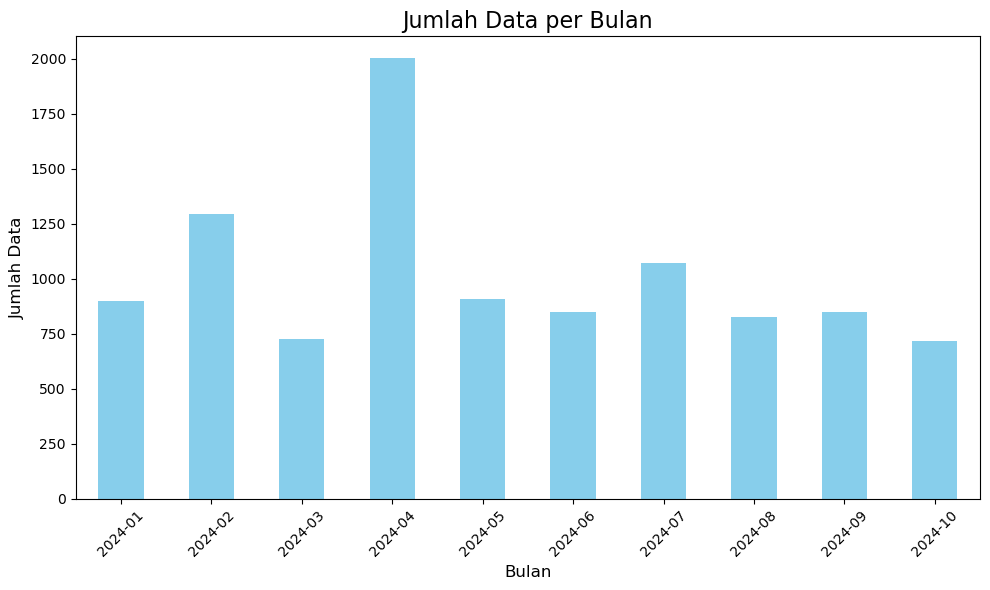

In [34]:
import matplotlib.pyplot as plt
#Buat grafik batang
plt.figure(figsize=(10, 6))  # Atur ukuran grafik
data_per_month.plot(kind='bar', color='skyblue')

plt.title('Jumlah Data per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=45)  

plt.tight_layout() 
plt.show()

# Data Preprocessing

In [39]:
data=pd.DataFrame(dfa['full_text'])

## Sentence Splitting

In [42]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

data['sentences'] = data['full_text'].apply(sent_tokenize)
data = data.explode('sentences').reset_index(drop=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hanif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hanif\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  14225 non-null  object
 1   sentences  14225 non-null  object
dtypes: object(2)
memory usage: 222.4+ KB


In [46]:
data.head()

,full_text,sentences
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...


## Cleaning

In [49]:
import re
import string

def clean_tweet(tweet):
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'<.*?>', '', tweet)  # Remove HTML tags
    tweet = re.sub(r'['
                  u'\U0001F600-\U0001F64F'
                  u'\U0001F300-\U0001F5FF'
                  u'\U0001F680-\U0001F6FF'
                  u'\U0001F1E0-\U0001F1FF'
                  u'\U00010000-\U0010FFFF'  # Extended Unicode for symbols and emojis
                  ']+', '', tweet)  # Remove emojis
    tweet = re.sub(r'@[\S]+', '', tweet)  # Remove user mentions
    tweet = re.sub(r'[0-9]+', '', tweet)  # Remove numbers
    tweet = re.sub(r'\$\w*', '', tweet)  # Remove dollar signs and currency symbols
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove 'RT' for retweets
    tweet = re.sub(r'#', '', tweet)  # Remove hashtags
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)  # Remove non-ASCII characters
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return tweet

# Apply the cleaning function to the 'sentences' column
data['cleansing'] = data['sentences'].apply(clean_tweet)

In [50]:
data.head()

,full_text,sentences,cleansing
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...


## Case Folding

In [54]:
data['case folding']=data['cleansing'].apply(lambda x:x.lower())
data.head()

,full_text,sentences,cleansing,case folding
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya,oh kek kopken janjijiwa gitu ya
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...,lanjut dari janjijiwa ke stay hungry ada yang ...
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic,janjijiwa seblak aesthetic
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...,knp byk yg ga suka janjijiwa pdhl itu fav gu...


### Replace janji jiwa with janji_jiwa

In [57]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'janjijiwa', 'janji_jiwa', text, flags=re.IGNORECASE)
    return text

data['case folding'] = data['case folding'].apply(preprocess_text)


## Tokenizing

In [60]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

data['tokens'] = data['case folding'].apply(tokenize_text)
data.head()

,full_text,sentences,cleansing,case folding,tokens
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya,oh kek kopken janji_jiwa gitu ya,"[oh, kek, kopken, janji_jiwa, gitu, ya]"
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...,lanjut dari janji_jiwa ke stay hungry ada yang...,"[lanjut, dari, janji_jiwa, ke, stay, hungry, a..."
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,"[hari, ini, kopi, nya, caramel, macchiato, dar..."
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic,janji_jiwa seblak aesthetic,"[janji_jiwa, seblak, aesthetic]"
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...,knp byk yg ga suka janji_jiwa pdhl itu fav g...,"[knp, byk, yg, ga, suka, janji_jiwa, pdhl, itu..."


## Normalization

In [62]:
import json
with open('slangword.txt', 'r', encoding='utf-8') as s:
    slang_dict = json.load(s)

def normalize_text(text):
    words=text
    return [slang_dict.get(word,word) for word in text]

data['normalize']=data['tokens'].apply(normalize_text)

In [63]:
data.head()

,full_text,sentences,cleansing,case folding,tokens,normalize
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya,oh kek kopken janji_jiwa gitu ya,"[oh, kek, kopken, janji_jiwa, gitu, ya]","[oh, kayak, kopi kenangan, janji_jiwa, begitu,..."
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...,lanjut dari janji_jiwa ke stay hungry ada yang...,"[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, dari, janji_jiwa, ke, stay, hungry, a..."
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,"[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, ini, kopi, nya, caramel, macchiato, dar..."
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic,janji_jiwa seblak aesthetic,"[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]"
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...,knp byk yg ga suka janji_jiwa pdhl itu fav g...,"[knp, byk, yg, ga, suka, janji_jiwa, pdhl, itu...","[kenapa, banyak, yang, engga, suka, janji_jiwa..."


## Stopword Removal

In [65]:
pip install sastrawi

In [66]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

def remove_stopwords(text):
    filtered_tokens = [word for word in text if word not in factory.get_stop_words()]
    return filtered_tokens
    
data['Stopword']=data['normalize'].apply(lambda x: remove_stopwords(x))

In [68]:
data.head()

,full_text,sentences,cleansing,case folding,tokens,normalize,Stopword
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya,oh kek kopken janji_jiwa gitu ya,"[oh, kek, kopken, janji_jiwa, gitu, ya]","[oh, kayak, kopi kenangan, janji_jiwa, begitu,...","[kayak, kopi kenangan, janji_jiwa]"
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...,lanjut dari janji_jiwa ke stay hungry ada yang...,"[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, janji_jiwa, stay, hungry, tau]"
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,"[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, kopi, nya, caramel, macchiato, janji_jiwa]"
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic,janji_jiwa seblak aesthetic,"[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]"
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...,knp byk yg ga suka janji_jiwa pdhl itu fav g...,"[knp, byk, yg, ga, suka, janji_jiwa, pdhl, itu...","[kenapa, banyak, yang, engga, suka, janji_jiwa...","[banyak, engga, suka, janji_jiwa, padahal, fav..."


## Stemming

In [72]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [73]:
factory=StemmerFactory()
stemmer=factory.create_stemmer()

def stem_text(text):
    return[stemmer.stem(word) for word in text]

data['stemming']=data['Stopword'].apply(lambda x:' '.join(stem_text(x)))

In [74]:
data.head()

,full_text,sentences,cleansing,case folding,tokens,normalize,Stopword,stemming
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya,oh kek kopken janji_jiwa gitu ya,"[oh, kek, kopken, janji_jiwa, gitu, ya]","[oh, kayak, kopi kenangan, janji_jiwa, begitu,...","[kayak, kopi kenangan, janji_jiwa]",kayak kopi kenang janji jiwa
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...,lanjut dari janji_jiwa ke stay hungry ada yang...,"[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, janji_jiwa, stay, hungry, tau]",lanjut janji jiwa stay hungry tau
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,"[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, kopi, nya, caramel, macchiato, janji_jiwa]",hari kopi nya caramel macchiato janji jiwa
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic,janji_jiwa seblak aesthetic,"[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]",janji jiwa seblak aesthetic
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...,knp byk yg ga suka janji_jiwa pdhl itu fav g...,"[knp, byk, yg, ga, suka, janji_jiwa, pdhl, itu...","[kenapa, banyak, yang, engga, suka, janji_jiwa...","[banyak, engga, suka, janji_jiwa, padahal, fav...",banyak engga suka janji jiwa padahal favorit i...


In [75]:
import re

#replace janji jiwa dengan janji_jiwa
def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'janji jiwa', 'janji_jiwa', text, flags=re.IGNORECASE)
    return text

data['stemming'] = data['stemming'].apply(preprocess_text)


In [76]:
data.head()

,full_text,sentences,cleansing,case folding,tokens,normalize,Stopword,stemming
0,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,@moonjinbykairaa Oh kek kopken janji_jiwa gitu ya,Oh kek kopken janjijiwa gitu ya,oh kek kopken janji_jiwa gitu ya,"[oh, kek, kopken, janji_jiwa, gitu, ya]","[oh, kayak, kopi kenangan, janji_jiwa, begitu,...","[kayak, kopi kenangan, janji_jiwa]",kayak kopi kenang janji_jiwa
1,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janji_jiwa ke STAY HUNGRY ada yang...,Lanjut dari janjijiwa ke STAY HUNGRY ada yang ...,lanjut dari janji_jiwa ke stay hungry ada yang...,"[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, dari, janji_jiwa, ke, stay, hungry, a...","[lanjut, janji_jiwa, stay, hungry, tau]",lanjut janji_jiwa stay hungry tau
2,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,hari ini kopi nya caramel macchiato dari janji...,"[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, ini, kopi, nya, caramel, macchiato, dar...","[hari, kopi, nya, caramel, macchiato, janji_jiwa]",hari kopi nya caramel macchiato janji_jiwa
3,@Pai_C1 janji_jiwa seblak aesthetic,@Pai_C1 janji_jiwa seblak aesthetic,janjijiwa seblak aesthetic,janji_jiwa seblak aesthetic,"[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]","[janji_jiwa, seblak, aesthetic]",janji_jiwa seblak aesthetic
4,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,@FOODFESS2 @capymoio knp byk yg ga suka janji_...,knp byk yg ga suka janjijiwa pdhl itu fav gu...,knp byk yg ga suka janji_jiwa pdhl itu fav g...,"[knp, byk, yg, ga, suka, janji_jiwa, pdhl, itu...","[kenapa, banyak, yang, engga, suka, janji_jiwa...","[banyak, engga, suka, janji_jiwa, padahal, fav...",banyak engga suka janji_jiwa padahal favorit i...


In [94]:
# Remove rows with NaN in the *stemming* column.
df_cleaned = data.dropna(subset=['stemming'])

print(f'Row count after removing NaN in the stemming column.: {df_cleaned.shape[0]}')

Row count after removing NaN in the stemming column.: 14225


In [96]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   full_text     14225 non-null  object
 1   sentences     14225 non-null  object
 2   cleansing     14225 non-null  object
 3   case folding  14225 non-null  object
 4   tokens        14225 non-null  object
 5   normalize     14225 non-null  object
 6   Stopword      14225 non-null  object
 7   stemming      14225 non-null  object
dtypes: object(8)
memory usage: 889.2+ KB


In [98]:
print(df_cleaned['stemming'].isnull().sum())  # Mengecek jumlah nilai NaN

0


### Save the Dataset

In [101]:
df = pd.DataFrame(df_cleaned)
df.to_csv("datapro.csv", index=False)